            N = 10


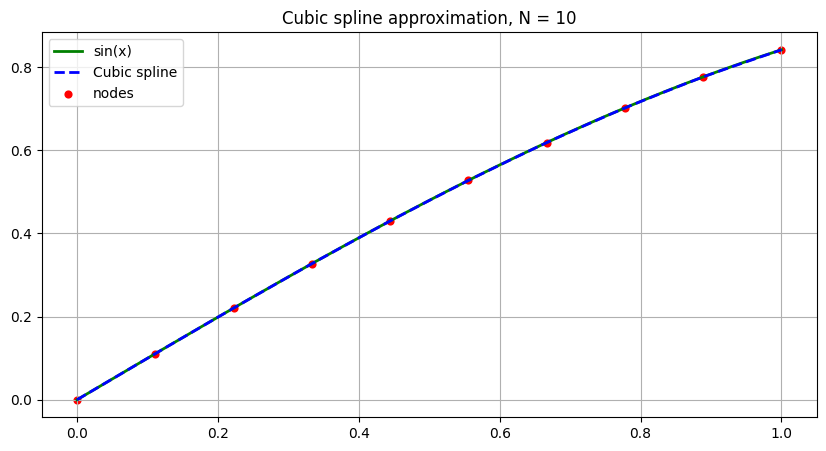

Максимальная ошибка: 0.0008690942913278654
            N = 50


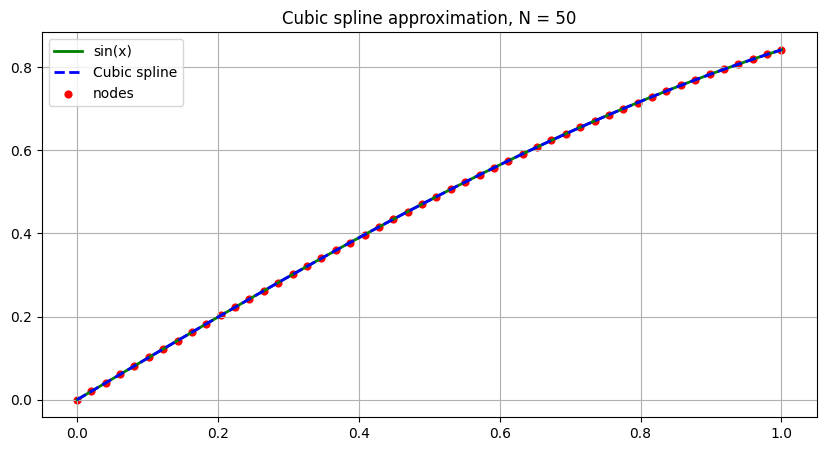

Максимальная ошибка: 2.9956501251482415e-05
            N = 100


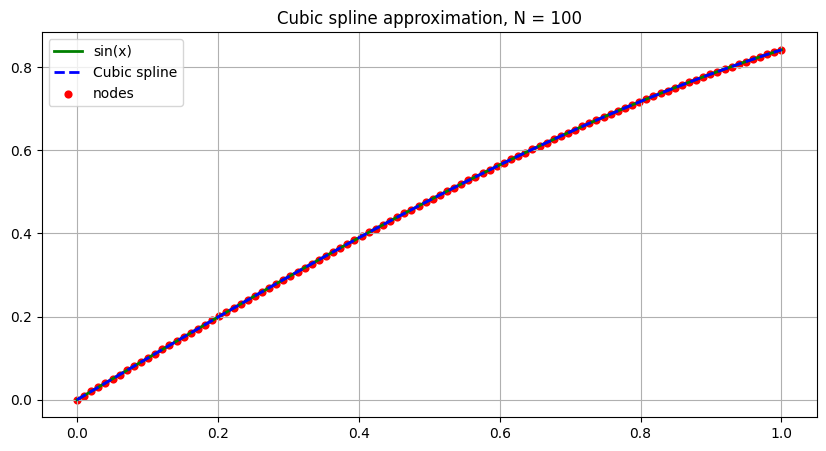

Максимальная ошибка: 7.348709389787267e-06
            N = 1000


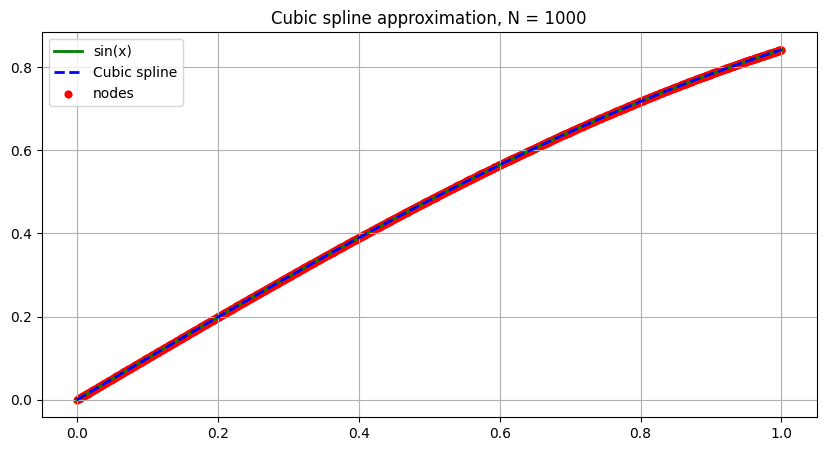

Максимальная ошибка: 7.197443652184887e-08


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def cubic_spline(x, y):
    n = len(x)
    h = np.diff(x)
    alpha = np.zeros(n)
    for i in range(1, n-1):
        alpha[i] = (3/h[i])*(y[i+1]-y[i]) - (3/h[i-1])*(y[i]-y[i-1])
    l = np.ones(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    for i in range(1, n-1):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    M = np.zeros(n)
    for j in range(n-2, -1, -1):
        M[j] = z[j] - mu[j]*M[j+1]
    def S(t):
        t = np.array(t)
        Svals = np.zeros_like(t)
        for k, xx in enumerate(t):
            i = np.searchsorted(x, xx) - 1
            if i < 0:
                i = 0
            if i >= n-1:
                i = n-2
            dx = xx - x[i]
            hi = h[i]
            A = (M[i+1] - M[i])/(6*hi)
            B = M[i]/2
            C = (y[i+1] - y[i])/hi - (2*hi*M[i] + hi*M[i+1])/6
            D = y[i]
            Svals[k] = A*dx**3 + B*dx**2 + C*dx + D
        return Svals
    return S


Ns = [10, 50, 100, 1000]

for N in Ns:
    print(f"            N = {N}")
    x = np.linspace(0, 1, N)
    y = f(x)

    spline = cubic_spline(x, y)

    xx = np.linspace(0, 1, 2000)
    yy = f(xx)
    ss = spline(xx)

    plt.figure(figsize=(10, 5))
    plt.plot(xx, yy, color='green',label="sin(x)", linewidth=2)
    plt.plot(xx, ss, "--", label="Cubic spline", color='blue', linewidth=2)
    plt.scatter(x, y, linewidths=2, color='red', s=15, label="nodes")
    plt.title(f"Cubic spline approximation, N = {N}")
    plt.legend()
    plt.grid(True)
    plt.show()

    #erroe
    error = np.max(np.abs(yy - ss))
    print("Максимальная ошибка:", error)